Retail is another industry which extensively uses analytics to optimize business processes. 

Tasks like product placement, inventory management, customized offers, product bundling, etc. are being smartly handled using data science techniques.

As the name suggests, this data comprises of transaction records of a sales store. This is a regression problem.

The data has 8523 rows of 12 variables.

# Regression problem

Problem: Predict the sales of a store.

# Sales Prediction-Big mart outlets
1. BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. 
2.  certain attributes of each product and store have been defined.
3.  Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales and use that information to take the correct measures to ensure success of their business.

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# read the train and test dataset
df_train_sales = pd.read_csv('train_bigmart.csv')
df_train_sales.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [166]:
df_train_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [167]:
df_train_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# data  visualization & feature engineering


In [168]:
df_train_sales.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


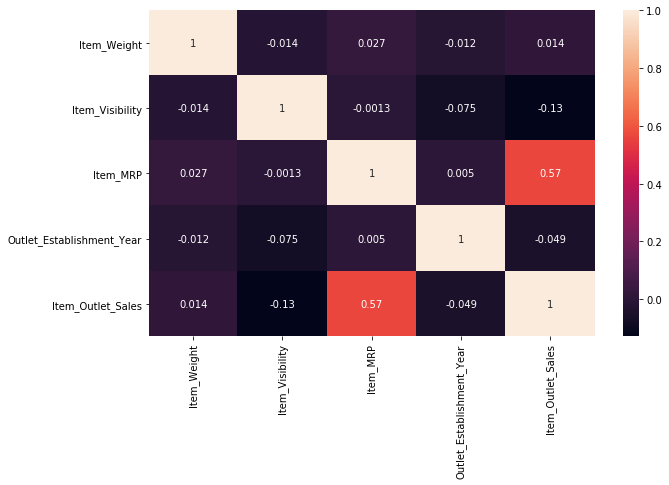

In [169]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df_train_sales.corr(),annot=True)

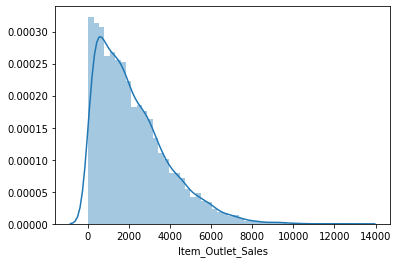

In [170]:
sns.distplot(df_train_sales['Item_Outlet_Sales'])

In [171]:
df_train_sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

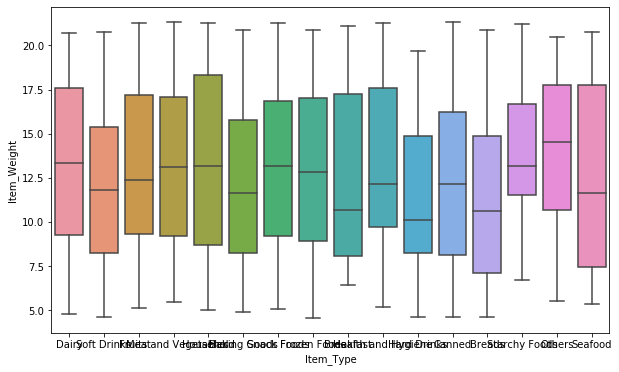

In [172]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Item_Type',y="Item_Weight",data=df_train_sales)

In [173]:
df_train_sales['Item_Weight'].mean()

12.857645184136183

In [174]:
import warnings
warnings.filterwarnings('ignore')
df_train_sales['Item_Weight'][df_train_sales['Item_Weight'].isnull()]=df_train_sales['Item_Weight'].mean()

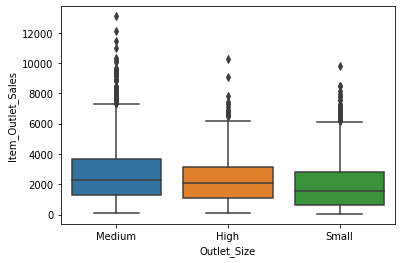

In [175]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data= df_train_sales)

In [176]:
df_sale=df_train_sales[['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales',]]

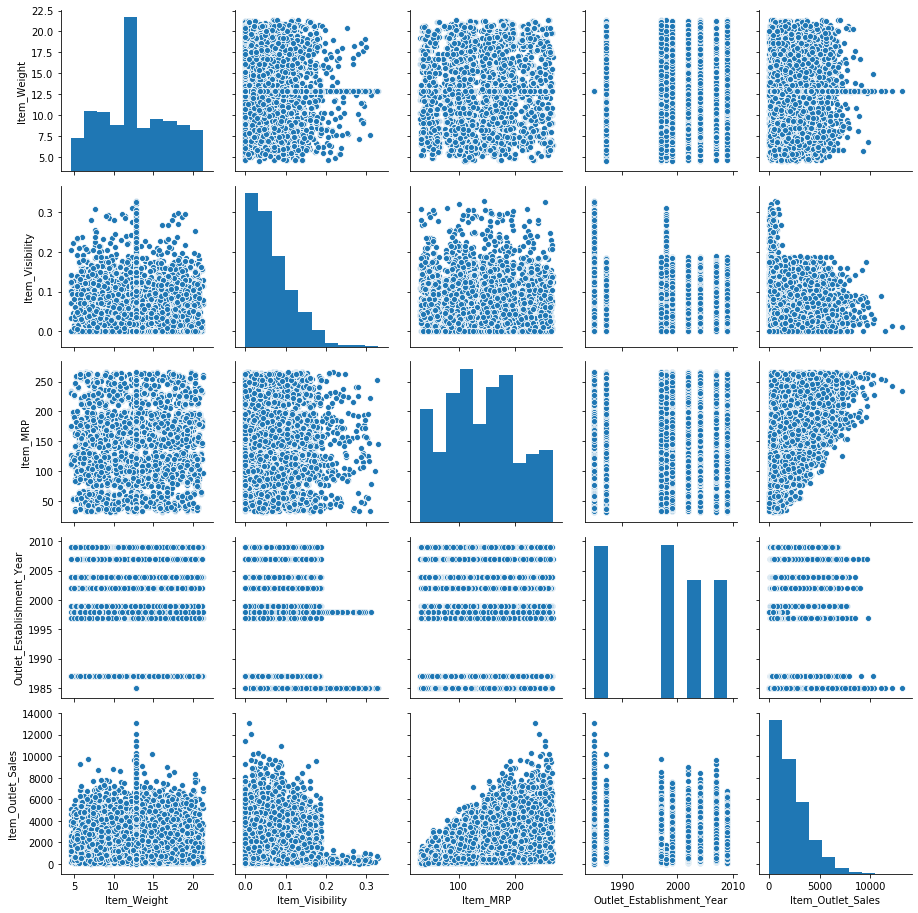

In [177]:
sns.pairplot(df_sale)

# Data Modeling

In [178]:
X= df_sale.drop(['Item_Outlet_Sales'],axis=1)
y=df_sale['Item_Outlet_Sales']

In [179]:
from sklearn.model_selection import train_test_split
# train-test-split   
X_train , X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.33,random_state=105)


In [180]:
# shape of the dataset
print('\nShape of training data :',df_train_sales.shape)



Shape of training data : (8523, 12)


In [181]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()



In [182]:
# fit the model with the training data
model.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [183]:
# intercept of the model
print('\nIntercept of model',model.intercept_)



Intercept of model 27764.553542747493


In [184]:
# coefficeints of the trained model
print('\nCoefficient of model :', model.coef_)




Coefficient of model : [   -5.76906086 -4533.85252827    15.61965466   -13.7182071 ]


In [185]:
predictions=model.predict(X_test)

'''
Create the object of the Linear Regression model

You can also add other parameters and test your code here

Some parameters are : fit_intercept and normalize

Documentation of sklearn LinearRegression: 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

 '''

In [186]:
predictions

array([2604.20879243, 1932.53283172, 1688.15766043, ..., 3844.68718048,
       2251.79959129, 1696.52797497])

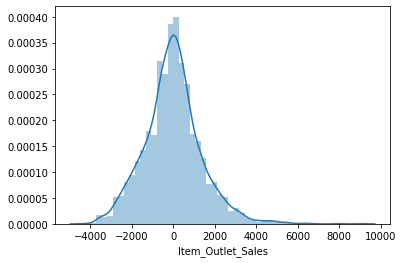

In [187]:
sns.distplot(y_test-predictions)

In [188]:
from sklearn import metrics

In [189]:
metrics.mean_absolute_error(y_test,predictions)

1033.1779577959705

In [190]:
# drop the null values
#data.dropna(how='any',inplace=True)


In [191]:
# Root Mean Squared Error on testing dataset

metrics.mean_squared_error(y_test,predictions)  #rmse test

1926432.4511107344

In [192]:
import numpy as np

In [193]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

1387.9598161008605

# Import Test data

In [194]:
df_test_sales=pd.read_csv("test_bigmart.csv")
df_test_sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [195]:
df_test_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


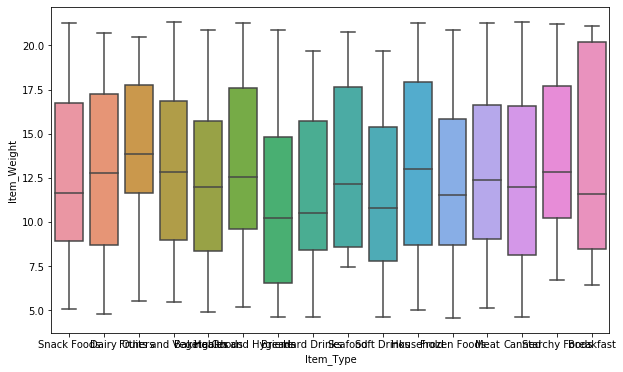

In [196]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Item_Type',y="Item_Weight",data=df_test_sales)

In [197]:
df_test_sales['Item_Weight'][df_test_sales['Item_Weight'].isnull()]= df_test_sales['Item_Weight'].mean()

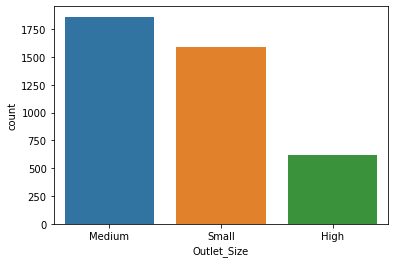

In [198]:
sns.countplot('Outlet_Size',data=df_test_sales)

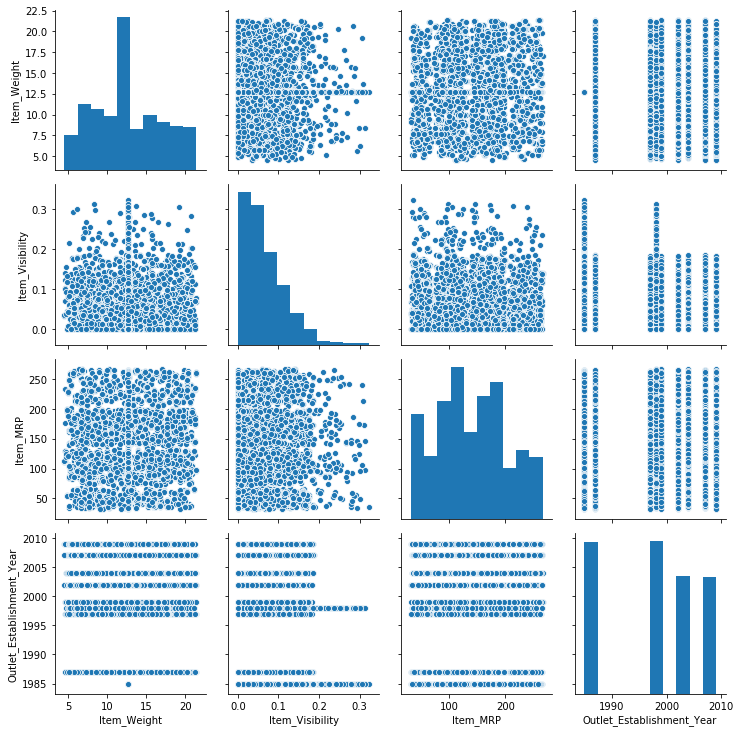

In [199]:
sns.pairplot(df_test_sales)

In [200]:
df_test_sale= df_test_sales[['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year']]

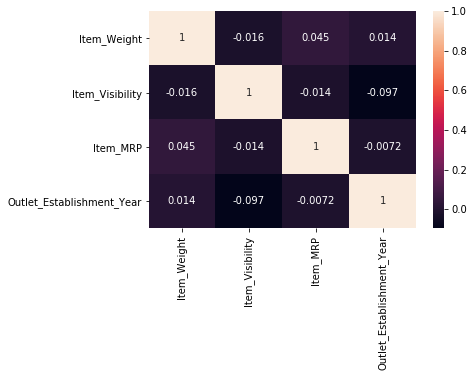

In [201]:
sns.heatmap(df_test_sale.corr(),annot=True)

In [202]:
X= df_test_sale

In [203]:
df_test_sales['Item_Outlet_Sales']=model.predict(X)

In [204]:
df_test_sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1872.621992
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1373.908380
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,3596.000380
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2541.720040
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,3581.550471
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2454.825576
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2154.514336
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1764.384932
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,3496.163652


In [205]:
data_frame= df_test_sales[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]

In [206]:
data_frame.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1872.621992
1,FDW14,OUT017,1373.908380
2,NCN55,OUT010,3596.000380
3,FDQ58,OUT017,2541.720040
4,FDY38,OUT027,3581.550471


In [207]:
data_frame.to_csv('Big Market Sales.csv',index=0)

In [209]:
df_train_sales = pd.read_csv('train_bigmart.csv')
df_train_sales.head()


df_test_sales=pd.read_csv("test_bigmart.csv")
df_test_sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [210]:
# checking the null values and  filling with respect to their data type for both train and test

df_train_sales.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [211]:
df_test_sales.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [212]:
df_train_sales.shape

(8523, 12)

In [213]:
df_test_sales.shape

(5681, 11)

In [214]:
df_train_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [215]:
df_test_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [216]:
df_train_sales['Item_Weight'].fillna(df_train_sales['Item_Weight'].median(),inplace=True)
df_train_sales['Outlet_Size'].fillna(df_train_sales['Outlet_Size'].mode()[0],inplace=True)
df_train_sales.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [217]:
df_test_sales['Item_Weight'].fillna(df_test_sales['Item_Weight'].median(),inplace=True)
df_test_sales['Outlet_Size'].fillna(df_test_sales['Outlet_Size'].mode()[0],inplace=True)
df_test_sales.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [218]:
data_frame1= df_train_sales[['Item_Identifier','Item_Weight','Outlet_Size']]
data_frame1.to_csv('Big Market Sales train full.csv',index=0)

In [222]:
data_frame1['Item_Weight'].median()

12.6

In [223]:
data_frame1['Outlet_Size'].mode()

0    Medium
dtype: object